# World Happiness Report
The traget will be to predict Happiness Score

In [117]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [118]:
#LODING DATA
df=pd.read_csv("happines.csv")

In [119]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#EDA

In [120]:
df.drop(["Country","Happiness Rank"], axis=1, inplace=True)

In [121]:
# The name of the country and Happiness rank is not adding any thing to the data so we droped them 

In [122]:
df.shape

(158, 10)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [124]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [125]:
# As we can see there id huge difference between 75 percentile and max value in some values so there are some skewness

In [126]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

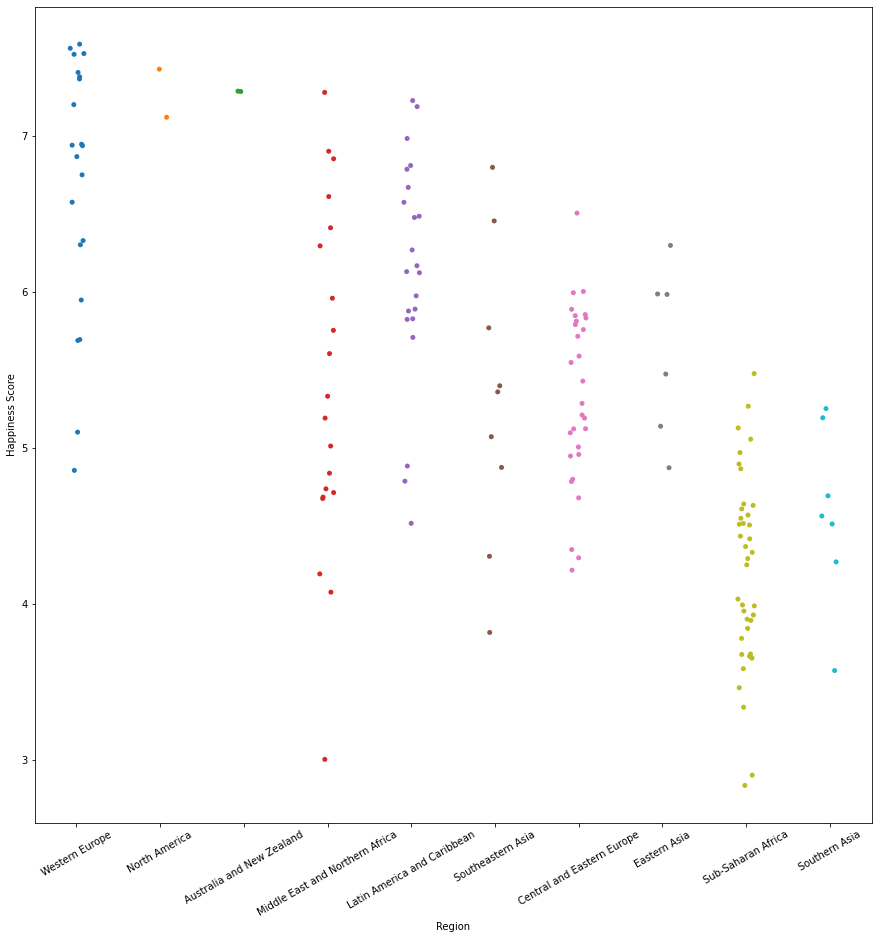

In [127]:
plt.figure(figsize=(15,15)) 
sns.stripplot(x="Region", y="Happiness Score", data=df)
plt.xticks(rotation=30)
plt.show()

In [128]:
# We are dropin Region feature as we can see in the stripplot western europe, north america, Australia and New Zeland has approx max happiness score so it wont we adding any isghts to the dataset. so we are droping region column

In [129]:
df.drop("Region", axis=1,inplace=True)

In [130]:
df.shape

(158, 9)

In [131]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [132]:
# Defining correlation 

In [133]:
cor=df.corr()

In [134]:
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

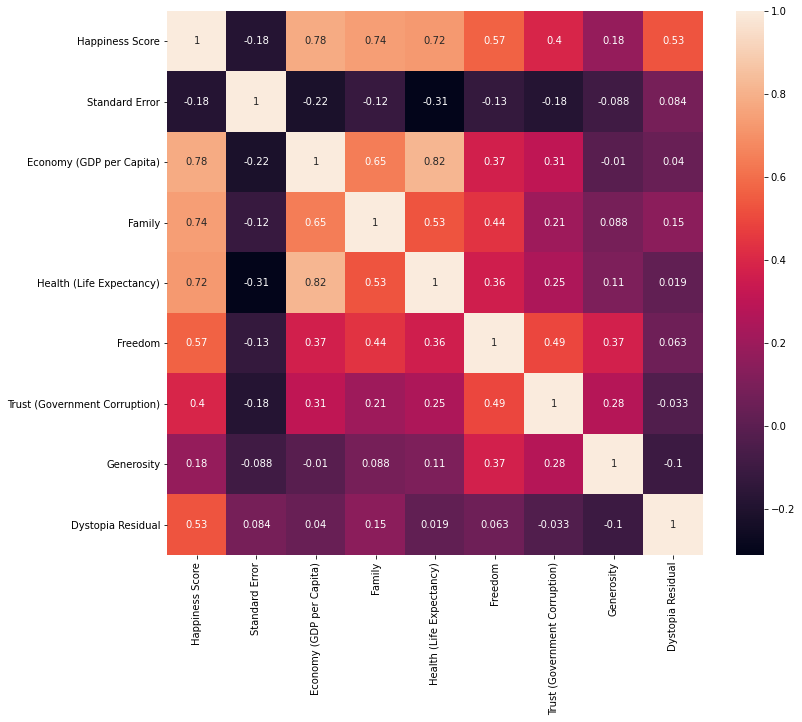

In [135]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [136]:
# checking outliers

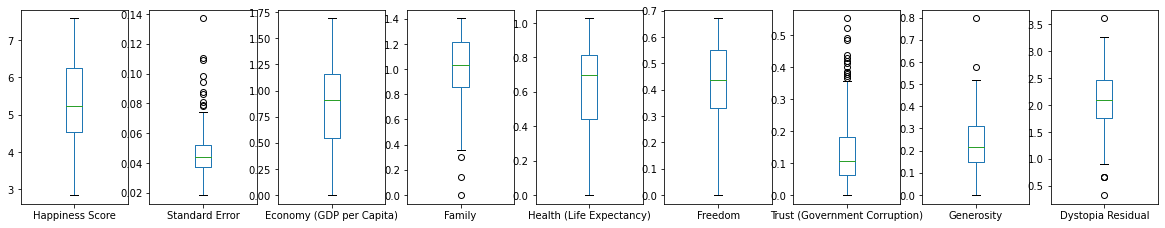

In [137]:
df.plot(kind="box", subplots=True, layout=(6,11),sharex=False, legend=False,figsize=(25,25) )
plt.show()

In [138]:
#spliting value

In [139]:
y=df["Happiness Score"]

In [140]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [141]:
x=df.drop("Happiness Score",axis=1)

In [142]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [143]:
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# We have very less number of data. so to provide any further loss of data we are not treating outliers we are treating skewness to avoid data loss

In [144]:
from sklearn.preprocessing import power_transform

In [145]:
newsk=power_transform(x)

In [146]:
newsk=pd.DataFrame(newsk,columns=x.columns)

In [147]:
newsk.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [148]:
x=newsk

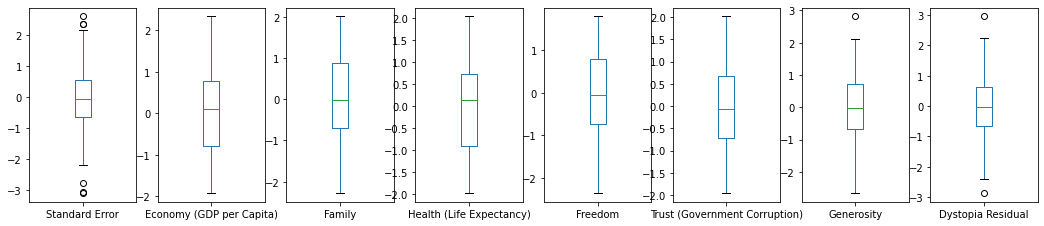

In [149]:
x.plot(kind="box", subplots=True, layout=(6,11),sharex=False, legend=False,figsize=(25,25) )
plt.show()

# as we can see a lot of outliers has been treated the remaings are very close to wishkers so we will leave them as it is.

In [150]:
# Creating LineraRegresion model

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=46)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [153]:
lr=LinearRegression()

In [154]:
lr.fit(x_train,y_train)

LinearRegression()

In [155]:
lr.score(x_train,y_train)

0.9932184710036785

In [156]:
pred=lr.predict(x_test)

In [157]:
print("Predicted Happiness: ", pred)
print("Actual Happiness: ", y_test)

Predicted Happiness:  [5.99793261 6.79193725 6.12692375 3.72803413 6.48298044 5.12292989
 7.44826516 5.1961137  4.76615535 3.17415182 5.25765353 7.21908653
 3.60927521 4.88153727 5.69862174 3.92701354 5.99169699 4.03360005
 5.20485208 4.98602119 4.69937515 7.04692548 5.05115439 4.34761716
 7.28657897 5.96048484 4.07658209 7.38567841 4.67398097 4.36569484
 6.02582971 5.88198479 3.3485561  5.73437075 5.7743491  4.66691836
 5.13586271 6.20407775 5.96772552 4.73670834 5.30236361 4.73439316
 6.34326626 6.79554037 5.02056341 6.13496207 7.7754119  7.13141984
 6.3275594  4.18988258 6.07681937 5.04848589 6.96546725]
Actual Happiness:  42     6.123
24     6.786
49     5.948
152    3.575
27     6.611
78     5.253
4      7.427
77     5.268
90     5.057
156    2.905
74     5.360
8      7.286
151    3.587
91     5.013
71     5.474
142    3.896
54     5.848
128    4.307
87     5.102
89     5.073
108    4.694
17     6.940
85     5.124
133    4.218
11     7.226
43     6.003
136    4.033
10     7.278
10

In [158]:
print("Error:")
print("Mean Squared Error: ", mean_squared_error(y_test,pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
print("R2_Score: ", r2_score(y_test,pred))

Error:
Mean Squared Error:  0.01606416206235845
Mean Absolute Error:  0.0998589301966392
R2_Score:  0.9878039833443708


#Saving the model

In [159]:
import joblib
joblib.dump(lr,"HappinessLR.pkl")

['HappinessLR.pkl']

#Loading the Saved Model

In [160]:
model=joblib.load("HappinessLR.pkl")

In [161]:
prediction=model.predict(x_test)

In [162]:
print(r2_score(y_test,prediction))

0.9878039833443708
